In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

LOAD THE DATA

In [2]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No' :0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [4]:
y = data['Admitted']
x1 = data['SAT']

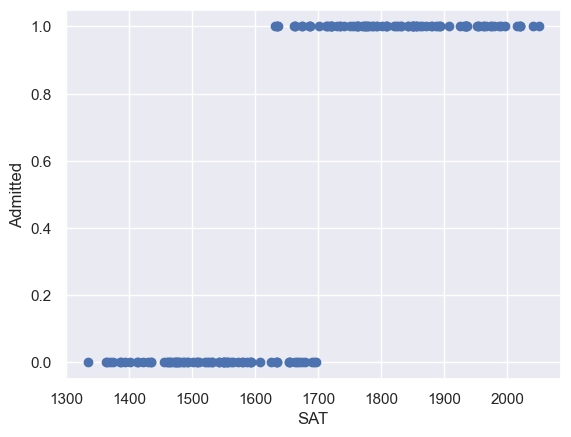

In [5]:
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

TRY PLOTTING IT USING LINEAR REGRESSION

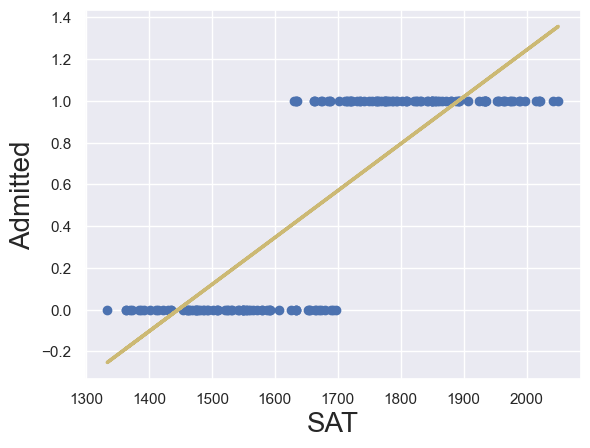

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()
plt.scatter(x1, y, color = 'C0')
y_hat = x1*results_lin.params[1] +  results_lin.params[0]

plt.plot(x1, y_hat, lw = 2.5, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

OUR DATA IS NON LINEAR SO THE FIRST RULE TO APPLY LINEAR REGRESSION WAS VIOLATED HENCE WE GET AN INCORRECT PLOT WHICH IS NOT EVEN BOUNDED BETWEEN 0 AND 1

NOW TRY THE SAME USING LOGISTIC REGRESSION MODEL

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


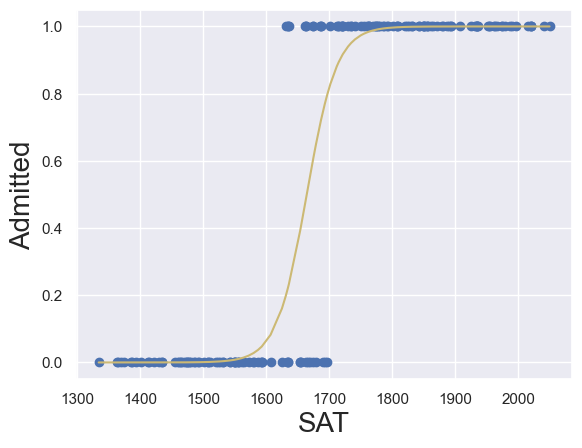

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.sort(np.array(x1)))

plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()

In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.7992
Time:                        12:02:44   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""